# Paper relevance

This notebook plot the paper relevance period

In [11]:
import datetime 
import os
import re

import numpy as np
import pandas as pd

from helper import display_df_with_bokeh

pd.set_option('display.width', 400)

In [12]:
DATASETS_FOLDER = "datasets"

In [13]:
# Opening original network with modularity
with open(f"gephi/dynamic/nodes_with_all_network_stats_and_timestamps.csv", 'r') as f:
    gephi_df = pd.read_csv(f, header=0)

gephi_df['date'] = gephi_df['date'].astype('datetime64[ns]')
gephi_df['last_citation'] = gephi_df['last_citation'].astype('datetime64[ns]')

In [14]:
def difference_btw_dates(date1, date2):
    td = date2 - date1
    return td.days

In [15]:
gephi_df['date_diff'] = gephi_df.apply(lambda x: difference_btw_dates(x['date'], x['last_citation']), axis=1)

In [16]:
print('Time a paper is relevant:')
print('Median\t', gephi_df['date_diff'].median())
print('Mean\t', gephi_df['date_diff'].mean())

gephi_df['date_diff'].describe()

Time a paper is relevant:
Median	 737.0
Mean	 1018.5196092567227


count    27742.000000
mean      1018.519609
std        985.122341
min          0.000000
25%        164.000000
50%        737.000000
75%       1629.000000
max       4102.000000
Name: date_diff, dtype: float64

## Matplotlib

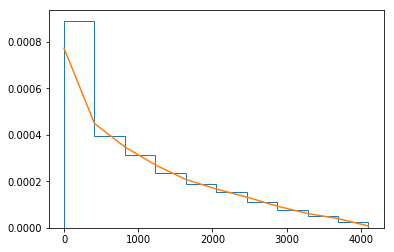

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

values = list(gephi_df['date_diff'])
density = stats.gaussian_kde(values)
n, x, _ = plt.hist(values, bins=10, 
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.show()

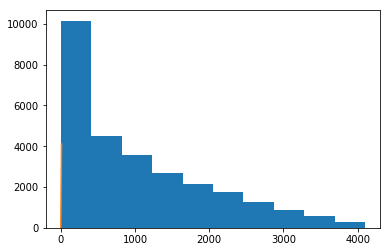

In [18]:
n, x, _ = plt.hist(values, bins=10)  
plt.plot(x)
plt.show()

## Bokeh

In [19]:
from bokeh.io import output_file, output_notebook
from bokeh.models.widgets import DataTable, DateFormatter, TableColumn
from bokeh.models import ColumnDataSource
from bokeh.plotting import show
from bokeh.plotting import figure
import numpy as np
import pandas as pd

from bokeh.models.glyphs import Line
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label

from helper import display_df_with_bokeh

In [22]:
hist, edges = np.histogram(values, bins=20, range = [0, 4200])

# Create the blank plot
p = figure(plot_height = 600, plot_width = 900, 
           title = 'Paper relevance',
          y_axis_label = 'Number of Papers', 
           x_axis_label = 'Relevance period (in days)')

# # Add a quad glyph
p.quad(bottom=0, top=hist, 
       left=edges[:-1], right=edges[1:],
       fill_color= 'white', line_color='#C3C3C3')



source = ColumnDataSource(dict(x=edges[:-1], y=hist))

glyph = Line(x="x", y="y", line_color="#FFA500", line_width=3, line_alpha=1)
p.add_glyph(source, glyph)

# labels = LabelSet(x='x', y='y', text='y', level='glyph',
#               x_offset=5, y_offset=5, source=source, render_mode='canvas')

# labels.text_font_size = "14px"
# p.add_layout(labels)

density = stats.gaussian_kde(values)

# Show the plot
show(p)